# Preserving Data–Statistic Bijection in Lets-Plot

Some statistical geometries in Lets-Plot (such as `geom_sina()`) generate their own statistical data, while still keeping a one-to-one correspondence with the original input data points.
Previously, this correspondence was not preserved in the mapping: if you mapped an aesthetic (e.g., `color`) to a column from the original dataset, all points could end up with an aggregated value.  

Now, Lets-Plot preserves the **bijection between data and statistics** for such geometries. This means you can safely map aesthetics to variables from the original dataset, and they will be correctly aligned with the statistical output.

In [1]:
import pandas as pd

from lets_plot import *


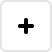
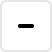
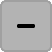
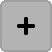
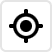
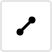
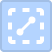
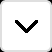
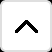
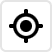
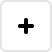
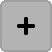
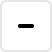
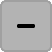
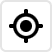
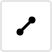
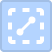
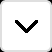
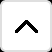
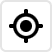

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
# Map color to "displ" and size to "cyl" for the sina stat
ggplot(df, aes("drv", "hwy")) + \
    geom_violin() + \
    geom_sina(aes(color="displ", size="cyl"), seed=42) + \
    scale_size(range=[2, 4])

In [5]:
# Map color to "displ" and size to "cyl" for the QQ-stat
ggplot(df) + \
    geom_qq(aes(sample="hwy", color="displ", size="cyl")) + \
    scale_size(range=[3, 6])

In [6]:
# Use values from original dataset in the tooltips
ggplot(df, aes(sample="hwy")) + \
    geom_qq_line() + \
    geom_qq(size=3, shape=21, color="black", fill="yellow", alpha=.5,
            tooltips=layer_tooltips().title("@manufacturer @model")
                                     .line("theoretical|@..theoretical..")
                                     .line("highway mileage (sample)|@..sample..")
                                     .line("city mileage|@cty")
                                     .line("engine displacement in liters|@displ")
                                     .line("year of manufacturing|@year")
                                     .line("number of cylinders|@cyl")
                                     .line("type of transmission|@trans")
                                     .line("drive type|@drv")
                                     .line("fuel type|@fl")
                                     .line("vehicle class|@class"))